In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [32]:
A1 = pd.read_csv('Arrh1.csv')
A2 = pd.read_csv('Arrh2.csv')

In [36]:
A1['ln_k'] = np.log(A1['k [s-1]'])  
A1['1/T'] = 1 / A1['T [K]']  

x = A1[['1/T']]  
y = A1['ln_k']      
model = LinearRegression().fit(x, y)

gradient = model.coef_[0]
intercept = model.intercept_
y_pred = model.predict(x)

R = 8.314 
Ea = -gradient * (R / 1000)  

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)


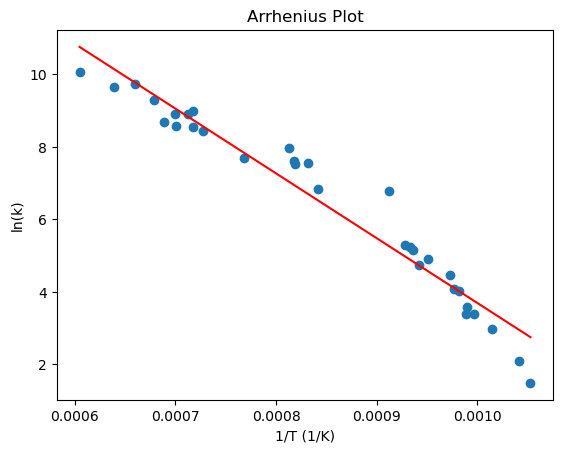

148.64925253589428

In [37]:
plt.scatter(A1['1/T'], A1['ln_k'])
plt.plot(A1['1/T'], y_pred, color='red')  
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(k)')
plt.title('Arrhenius Plot')
plt.show()
Ea

In [39]:
subset = A1[(A1['T [K]'] >= 950) & (A1['T [K]'] <= 1100)]

x_subset = subset[['1/T']]
y_subset = subset['ln_k']
model_subset = LinearRegression().fit(x_subset, y_subset)

gradient_subset = model_subset.coef_[0]
Ea_subset = -gradient_subset * (8.314 / 1000)  

y_pred_subset = model_subset.predict(x_subset)
r2_subset = r2_score(y_subset, y_pred_subset)

print(f"Full Dataset: Activation Energy (Ea) = {Ea:.2f} kJ/mol, R-squared = {r2:.3f}")
print(f"Subset Dataset: Activation Energy (Ea) = {Ea_subset:.2f} kJ/mol, R-squared = {r2_subset:.3f}")


Full Dataset: Activation Energy (Ea) = 148.65 kJ/mol, R-squared = 0.950
Subset Dataset: Activation Energy (Ea) = 265.74 kJ/mol, R-squared = 0.959
